In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Forest_fire = pd.read_csv('F:\\PYTHON\\DATA SCIENCE\\KNN AND SVM\\Assignment\\SVM\\forestfires.csv')

In [3]:
Forest_fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
Forest_fire.shape

(517, 31)

In [5]:
Forest_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
duplicate = Forest_fire[Forest_fire.duplicated()]
# Dupicated values 

In [7]:
Forest_fire = Forest_fire.drop(duplicate.index ,axis=0).reset_index(drop=True)

In [8]:
Forest_fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
505,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
506,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
507,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


<AxesSubplot:xlabel='month', ylabel='Count'>

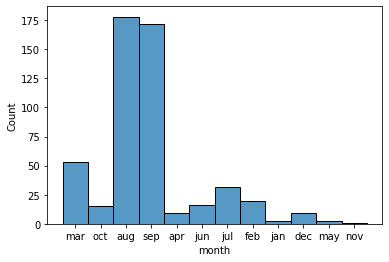

In [9]:
sns.histplot(Forest_fire['month'])
# Majority of forest fire happened in the month of aug and sep 

<AxesSubplot:xlabel='day', ylabel='Count'>

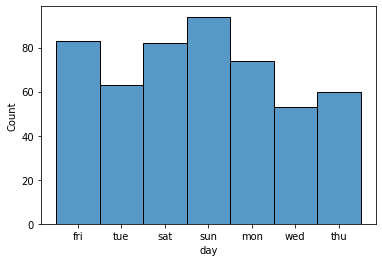

In [10]:
sns.histplot(Forest_fire['day'])
# Can see cases on weekends are slightly larger compared to weekdays.

In [11]:
Forest_fire['month'] = Forest_fire.month.map(lambda x : 1 if x == 'sep' or x == 'aug' else 0)
# Mapping 1 for forest fire happend in the month of 'sep' and 'aug'

In [12]:
Forest_fire['month'].value_counts()
# 69% of the forest fire happend in the month of aug and sep 

1    350
0    159
Name: month, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder = LabelEncoder()
Forest_fire['day'] = label_encoder.fit_transform(Forest_fire['day'])
# Converting categirical data 

C:\Users\admin\anaconda3.2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='temp'>

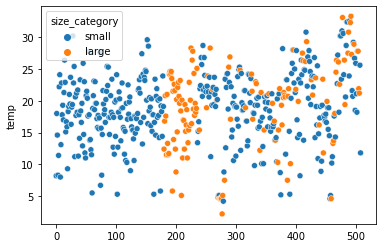

In [15]:
sns.scatterplot(pd.Series(range(0,510)),Forest_fire['temp'] ,hue= Forest_fire['size_category'])
# Greater number of forest fire happend as tem increases , but it cant alone decide whether its large of small fire

In [16]:
X = Forest_fire.iloc[: ,0:10]
Y = Forest_fire.iloc[: ,-1]
# Dropping all dummies 

In [17]:
X['size'] = Y

In [18]:
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size
0,0,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,0,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,0,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small
3,0,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,small
4,0,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,small
...,...,...,...,...,...,...,...,...,...,...,...
504,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,large
505,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,large
506,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,large
507,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,small


In [19]:
X.skew()
# FFMC , ISI and rain having higher skewness

C:\Users\admin\AppData\Local\Temp/ipykernel_7972/1439878620.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.skew()


month    -0.812051
day       0.159242
FFMC     -6.540474
DMC       0.558596
DC       -1.100245
ISI       2.529891
temp     -0.321869
RH        0.869644
wind      0.581689
rain     20.044822
dtype: float64

In [20]:
X.kurtosis()
# FFMC , ISI and rain having higher kurtosis

C:\Users\admin\AppData\Local\Temp/ipykernel_7972/2330635454.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.kurtosis()


month     -1.345876
day       -1.099809
FFMC      66.255682
DMC        0.251618
DC        -0.242656
ISI       21.288771
temp       0.101560
RH         0.447242
wind       0.043986
rain     426.542289
dtype: float64

<AxesSubplot:>

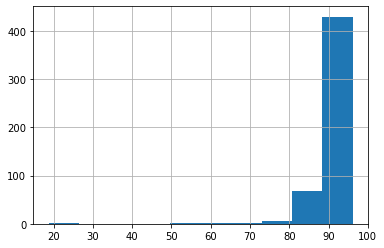

In [21]:
X['FFMC'].hist()
# Data having outliers.

<AxesSubplot:xlabel='FFMC', ylabel='Count'>

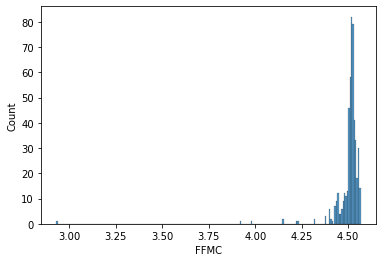

In [22]:
sns.histplot(np.log(X['FFMC']))
# Even trasforming did'nt change data much. 

C:\Users\admin\anaconda3.2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FFMC'>

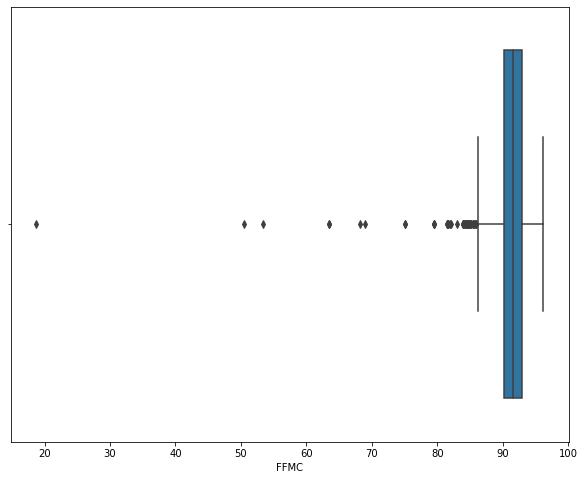

In [23]:
plt.figure(figsize=(10,8))
sns.boxplot(X['FFMC'])
# Outliers 

In [24]:
X =  X[X['FFMC']>82].reset_index(drop=True)

-1.0101703035168768
1.2197812848719312


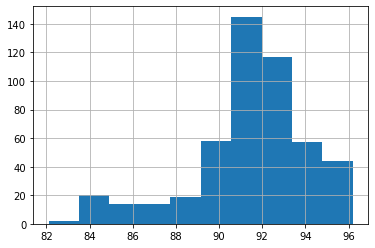

In [25]:
X['FFMC'].hist()
print(X['FFMC'].skew())
print(X['FFMC'].kurt())
# FFMC after removing outliers.

In [26]:
print(np.log(X['ISI']).skew())
print(np.log(X['ISI']).kurt())
# Trasforming 'ISI' , improving skew and kurt 

-0.3956429750308574
1.1023035647359394


In [27]:
X['ISI'] = np.log(X['ISI'])

19.666965530007538
410.6099506219663


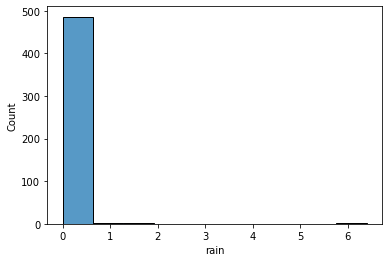

In [28]:
sns.histplot(X['rain'])
print(X['rain'].skew())
print(X['rain'].kurt())

C:\Users\admin\anaconda3.2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rain'>

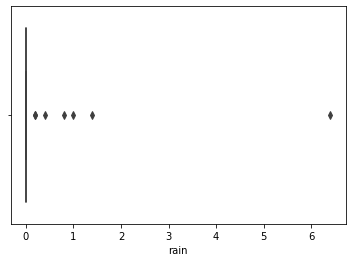

In [29]:
sns.boxplot(X['rain'])

In [30]:
X[X['rain']>0]
# Removing outlier (rain == 6.4) and categorizing data to rain and no_rain (since data has more 0's)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size
3,0,0,91.7,33.3,77.5,2.197225,8.3,97,4.0,0.2,small
232,1,3,91.8,175.1,700.7,2.624669,21.9,73,7.6,1.0,small
275,0,6,91.2,183.1,437.7,2.525729,12.6,90,7.6,0.2,small
479,1,5,96.1,181.1,671.2,2.660260,27.3,63,4.9,6.4,large
480,1,5,96.1,181.1,671.2,2.660260,21.6,65,4.9,0.8,small
481,1,5,96.1,181.1,671.2,2.660260,20.7,69,4.9,0.4,small
487,1,0,91.0,166.9,752.6,1.960095,21.1,71,7.6,1.4,small


In [31]:
X= X.drop(index=[479] , axis=0 ).reset_index(drop=True)

In [32]:
X['rain'] = X.rain.map(lambda x : 1 if x > 0 else 0)

In [33]:
x = X.iloc[: ,0:10]
y = X.iloc[: ,-1]

# Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
Forest  = scaler.fit_transform(x)
Forest

array([[-1.52529689e+00, -1.40342058e+00, -1.98148499e+00, ...,
         4.65090673e-01,  1.50270702e+00, -1.11455643e-01],
       [-1.52529689e+00,  1.17655184e+00, -2.96361234e-01, ...,
        -6.73320925e-01, -1.72802194e+00, -1.11455643e-01],
       [-1.52529689e+00, -3.71431613e-01, -2.96361234e-01, ...,
        -6.73320925e-01, -1.50521305e+00, -1.11455643e-01],
       ...,
       [ 6.55610068e-01, -1.40342058e+00, -1.43168165e-01, ...,
         1.72999245e+00,  2.00402703e+00,  8.97217922e+00],
       [ 6.55610068e-01, -1.40342058e+00, -1.43168165e-01, ...,
         1.16078665e+00,  7.78578112e-01, -1.11455643e-01],
       [ 6.55610068e-01, -3.71431613e-01,  1.15897292e+00, ...,
        -1.04115126e-01, -1.25301525e-03, -1.11455643e-01]])

In [37]:
Forest = pd.DataFrame(Forest,columns=x.columns)
Forest
# Scaled data frame

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,-1.525297,-1.403421,-1.981485,-1.384587,-1.914652,-1.110723,-1.909508,0.465091,1.502707,-0.111456
1,-1.525297,1.176552,-0.296361,-1.238055,0.464576,-0.507917,-0.180310,-0.673321,-1.728022,-0.111456
2,-1.525297,-0.371432,-0.296361,-1.105857,0.538254,-0.507917,-0.780236,-0.673321,-1.505213,-0.111456
3,-1.525297,-1.403421,0.124920,-1.271502,-1.984191,0.144042,-1.891863,3.374365,-0.001253,8.972179
4,-1.525297,0.144563,-0.794239,-0.984809,-1.881952,0.286618,-1.344872,3.500855,-1.226702,-0.111456
...,...,...,...,...,...,...,...,...,...,...
484,0.655610,-1.403421,-0.143168,0.856399,0.810202,-0.379815,-0.092085,1.856483,2.505347,-0.111456
485,0.655610,-1.403421,-0.143168,0.856399,0.810202,-0.379815,1.213636,-0.167360,-0.224062,-0.111456
486,0.655610,-1.403421,-0.143168,0.856399,0.810202,-0.379815,0.366681,1.729992,2.004027,8.972179
487,0.655610,-1.403421,-0.143168,0.856399,0.810202,-0.379815,-0.145020,1.160787,0.778578,-0.111456


In [38]:
y = y.map(lambda x : 1 if x == 'large' else 0)

In [39]:
y

0      0
1      0
2      0
3      0
4      0
      ..
484    0
485    0
486    0
487    0
488    0
Name: size, Length: 489, dtype: int64

0    358
1    131
Name: size, dtype: int64


<AxesSubplot:xlabel='size', ylabel='Count'>

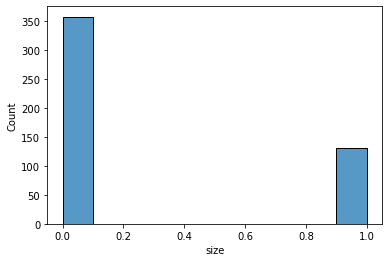

In [40]:
print(y.value_counts())
sns.histplot(y)
# 358 Small fires and 131 large fires

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score

In [51]:
X_train, X_test, y_train, y_test = train_test_split(Forest,y, test_size = 0.25)

# Model 

In [42]:
import tensorflow as tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model

In [41]:
#1  layer
#2 hidden layers
#4 dropout layer
#5 output layer

In [55]:
model = Sequential()
# input layer + 1st hidden layer
model.add(Dense(6, input_dim=10, activation='relu'))
# 2nd hidden layer
model.add(Dense(6, activation='relu'))
# output layer
model.add(Dense(6, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'relu'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 6)                 66        
                                                                 
 dense_13 (Dense)            (None, 6)                 42        
                                                                 
 dense_14 (Dense)            (None, 6)                 42        
                                                                 
 dropout_3 (Dropout)         (None, 6)                 0         
                                                                 
 dense_15 (Dense)            (None, 1)                 7         
                                                                 
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Compile Model
model.compile(optimizer = 'adam', metrics=['accuracy'], loss ='binary_crossentropy')
# Train Model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 10, epochs = 100)

Epoch 1/100
37/37 [==============================] - 1s 11ms/step - loss: 3.9526 - accuracy: 0.7322 - val_loss: 4.0130 - val_accuracy: 0.7398
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 4.0345 - accuracy: 0.7268 - val_loss: 4.0130 - val_accuracy: 0.7398
Epoch 3/100
37/37 [==============================] - 0s 4ms/step - loss: 3.9093 - accuracy: 0.7268 - val_loss: 4.0130 - val_accuracy: 0.7398
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 3.9848 - accuracy: 0.7295 - val_loss: 4.0130 - val_accuracy: 0.7398
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 3.8800 - accuracy: 0.7268 - val_loss: 4.0130 - val_accuracy: 0.7398
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 3.7125 - accuracy: 0.7240 - val_loss: 4.0130 - val_accuracy: 0.7398
Epoch 7/100
37/37 [==============================] - 0s 4ms/step - loss: 3.5272 - accuracy: 0.7240 - val_loss: 4.0130 - val_accuracy: 0.7398
Epoch 8/100


Epoch 59/100
37/37 [==============================] - 0s 5ms/step - loss: 1.2147 - accuracy: 0.6284 - val_loss: 0.6033 - val_accuracy: 0.7398
Epoch 60/100
37/37 [==============================] - 0s 4ms/step - loss: 1.4540 - accuracy: 0.6749 - val_loss: 0.6034 - val_accuracy: 0.7398
Epoch 61/100
37/37 [==============================] - 0s 3ms/step - loss: 1.4695 - accuracy: 0.6366 - val_loss: 0.6040 - val_accuracy: 0.7398
Epoch 62/100
37/37 [==============================] - 0s 4ms/step - loss: 1.5899 - accuracy: 0.7077 - val_loss: 0.6042 - val_accuracy: 0.7398
Epoch 63/100
37/37 [==============================] - 0s 3ms/step - loss: 1.2273 - accuracy: 0.6585 - val_loss: 0.6035 - val_accuracy: 0.7398
Epoch 64/100
37/37 [==============================] - 0s 3ms/step - loss: 0.9755 - accuracy: 0.6995 - val_loss: 0.6017 - val_accuracy: 0.7398
Epoch 65/100
37/37 [==============================] - 0s 3ms/step - loss: 1.3056 - accuracy: 0.6448 - val_loss: 0.6022 - val_accuracy: 0.7398
Epoch 

In [59]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))


Train: 0.730, Valid: 0.740


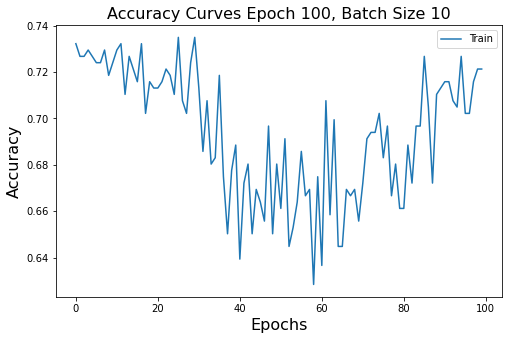

In [61]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves Epoch 100, Batch Size 10', fontsize=16)
plt.show()

# Batch Size:  6

In [77]:
model_1 = Sequential()
model_1.add(Dense(6, input_dim=10, activation='relu'))
model_1.add(Dense(6, activation='relu'))
model_1.add(Dense(6, activation='sigmoid'))
model_1.add(Dropout(0.2))
model_1.add(Dense(1, activation = 'relu'))

In [78]:
model_1.compile(optimizer = 'adam',
metrics=['accuracy'],
loss = 'binary_crossentropy')

In [81]:
# Fit Model
history = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0, batch_size=6)

In [82]:
_, train_acc = model_1.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))
# Model accuracy is imroved with batch size of 6

Train: 0.757, Valid: 0.707


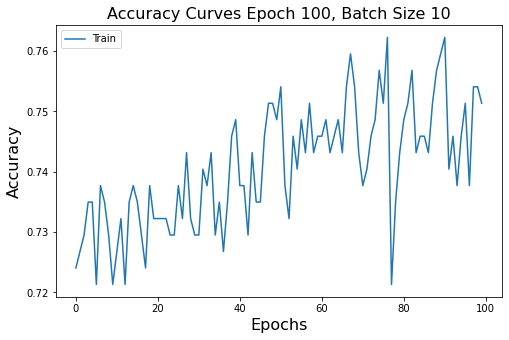

In [83]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves Epoch 100, Batch Size 10', fontsize=16)
plt.show()